# Decision trees

### What is a decision tree

A decision tree is a tree-like model used to make decisions based on input features. Each internal node represents a "test" or "decision" on an attribute, each branch represents the outcome of the test and each leaf node represents a class label (in classification) or a continuous value (in regression). 

### How does a decision tree work?

The process of building a decision tree involves selecting the best attribute to split the data at each node. This selection is based on criteria like Gini impurity, entropy or variance reduction. 

1. **Choosing the best split**: At each node, the algorithm evaluates all possible splits and selects the one that best separates the data. For classification trees, criteria like Gini impurity or information gain (entropy) are used. For regression trees, the reduction in variance is a common criterion.
2. **Splitting**: Once the best split is chosen, the dataset is divided accordingly, and the process is recursively repeated for each subset.
3. **Stopping criteria**: The tree continues to grow until a stopping criterion is met. This could be a maximum depth, a minimum number of samples in a node or a threshold for the impurity measure. 

### Decision tree classifier

To understand the decision tree classifier, some concepts need to be defined. 

#### Entropy

**Entropy** is a measure of randomness or uncertainty in the dataset (also called the degree of impurity or disorder in the context of decision trees). For example, if a dataset contains examples from only one class, its entropy is zero, indicating complete purity. Alternatively, if the dataset is evenly split between classes, its entropy is at its maximum of 1, indicating maximum disorder. For a binary classification problem, the equation for entropy is 

\begin{align*}
H(p_1, p_2) = - p_1 \log_2(p_1) - p_2 \log_2(p_2)
\end{align*}
where $p_1$ and $p_2$ are the probabilities of the two classes. 

In general, given a discrete random variable $X$ with range $R_X = \{x_1, \dots, x_k \}$ and probabilities $P:R_X \to [0, 1]$ the entropy is defined as
\begin{align*}
H(X) = - \sum_{x_k \in R_X} P(x_k) \log P(x_k)
\end{align*}
An equivalent definition of entropy is the expected value of the self-information of a random variable. Entropy measures the expected (i.e., average) amount of information conveyed by identifying the outcome of a random trial. 

In [7]:
import numpy as np
from scipy.stats import entropy

base = 2  # work in units of bits 
pk = np.array([0.5, 0.5])  # probabilities of the 2 classes
H = entropy(pk, base=base)

print(f'{pk=}, {H=}')

pk=array([0.5, 0.5]), H=np.float64(1.0)


#### Gini impurity

**Gini impurity** is another measure of impurity used in decision trees. It represents the probability of incorrectly classifying a randomly chosen element if it were labelled according to the distribution of labels in the subset. For example, Gini impurity is zero when all the elements belong to a single class (pure dataset). Alternatively, it reaches its maximum (0.5 for a binary classification problem) when the elements are equally distributed among the classes. In the case of a binary classification problem the Gini impurity is given as 
\begin{align*}
    G(p_1, p_2) = 1 - p_1^2 - p_2^2
\end{align*}

Generally, Gini impurity should be used with large datasets and entropy should be used in smaller datasets since entropy is typically harder to compute. 

#### Information gain 

**Information gain** measures the reduction in entropy or impurity after a dataset is split based on an attribute. It quantifies the effectiveness of an attribute in classifying the training data. For example, a high information gain indicates that the attribute has effectively split the data into pure subsets. It is calculated as the difference between the entropy of the original dataset and the weighted sum of the entropies of the subsets created by the split. The equation for the information gain $IG$ is 

\begin{align*}
IG = H(\text{parent}) - \sum_i \left( \frac{|S_i|}{|S|} H(S_i)\right)
\end{align*}
where $S_i$ are the subsets created by the split, $|S|$ is the size of the original dataset and $H$ is the entropy. 

#### What is pruning? 

Decision trees are a powerful tool for classification and regression tasks due to their simplicity and interpretability. However, they are prone to overfitting, especially when they grow too deep and learn the noise in the training data. To combat this, pruning techniques - pre-pruning and post-pruning - are used to improve the model's generalization performance. Pruning in decision trees refers to reducing the size of the tree by removing sections that provide little power in classifying instances. 

Pre-prunning, also known as early stopping, involves halting the growth of the decision tree before it becomes too complex. This is done by setting certain conditions that must be met for a split to occur. 

**Methods of pre-pruning**:

1. **Maximum depth**: limit the maximum depth of the tree. Once the tree reaches this depth, no further splits are made. 
2. **Minimum samples for split**: specify the minimum number of samples required to split a node. If a node has fewer samples than this threshold, it is not split further.
3. **Minimum samples per leaf**: define the minimum number of samples that a leaf node must have. Nodes that do not meet this criterion are not created. 
4. **Maximum number of nodes**: set a limit on the total number of nodes in the tree. Once this limit is reached, no additional nodes are created. 

**Advantages of pre-pruning**

1. **Efficiency**: trees are smaller and less complex, making them faster to construct and evaluate.
2. **Reduced overfitting**: by stopping the growth early, the model is less likely to learn noise from the training data.

**Disadvantages of pre-pruning**

1. **Underfitting**: there is a risk of stopping the growth too early, resulting in a model that is too simple and does not capture the underlying patterns in the data. 

**Methods of post-pruning**:

1. **Reduced error pruning**: remove nodes if the removal improves the performance of the tree on a validation dataset.
2. **Cost Complexity Pruning (CCP)**: introduce a cost complexity parameter that balances the tree size and its performance. Nodes are pruned if the cost complexity criterion is improved.
3. **Minimal Cost Complexity Pruning**: calculate the cost complexity for each subtree and prune the tree iteratively to minimize this cost.

**Advantages of post-pruning**:

1. **Better performance**: by allowing the tree to grow fully before pruning, the model can capture more complex patterns in the data before simplifying.
2. **More control**: post-pruning allows more refined adjustments, as the full tree is available for analysis.

**Disadvantages of post-pruning**:

1. **Computationally intensive**: growing a full tree and then pruning it can be more time-consuming and computationally expensive.
2. **Complexity**: requires more sophisticated techniques and validation datasets to determine which nodes to prune. 

In [8]:
# import the necessary modules 
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations, product
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

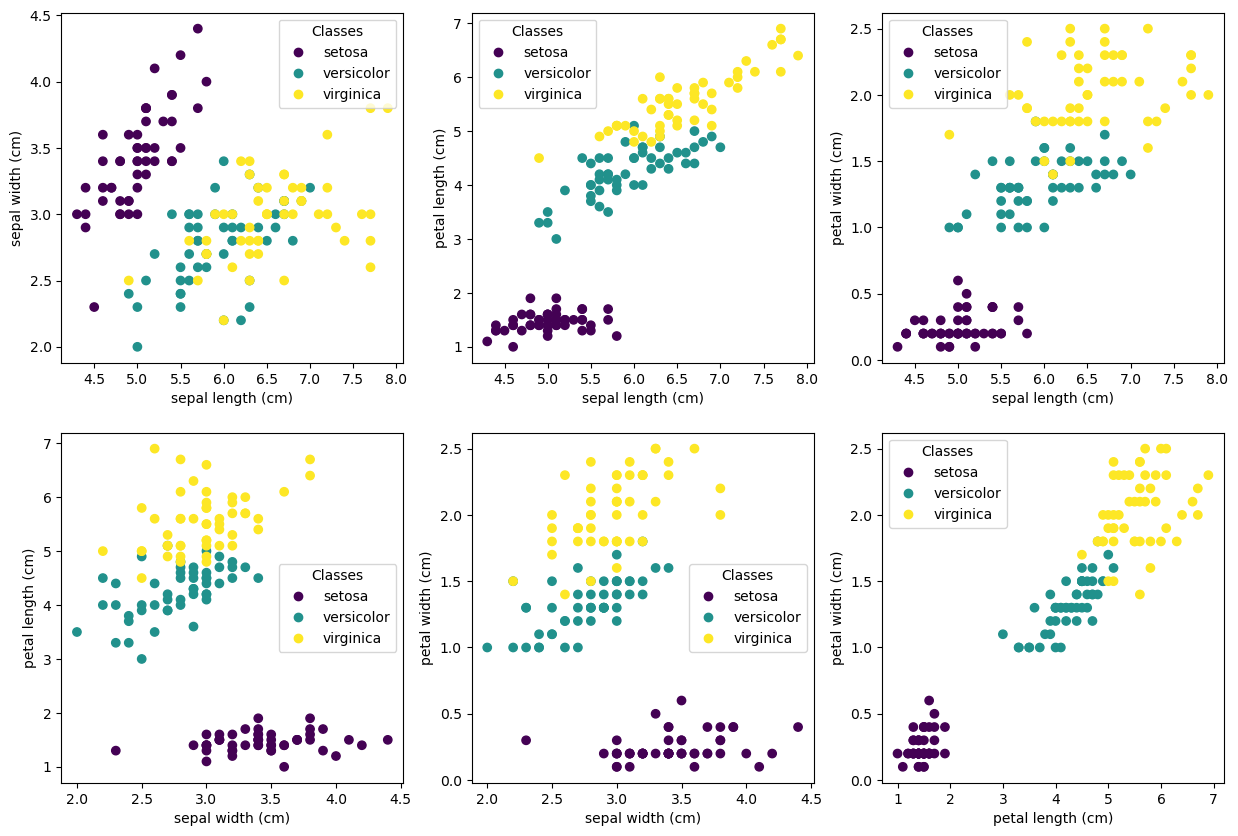

In [9]:
# Load the dataset 

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Plot the dataset

comb = combinations([0, 1, 2, 3], 2)
idxs = list(product([0, 1, 2], repeat=2))
n_r = 2
n_c = 3

fig, axs = plt.subplots(n_r, n_c, figsize=(5*n_c, 5*n_r))

for (i, j), (m, n) in zip(comb, idxs):
    scatter = axs[m, n].scatter(X[:, i], X[:, j], c=iris.target)
    axs[m, n].set_xlabel(iris.feature_names[i])
    axs[m, n].set_ylabel(iris.feature_names[j])
    axs[m, n].legend(scatter.legend_elements()[0], iris.target_names, loc='best', title='Classes')

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

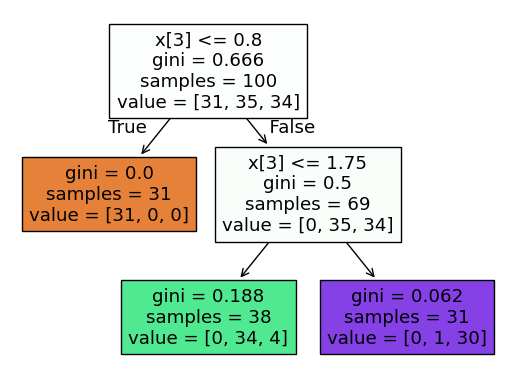

In [10]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the model with pre-pruning

model = tree.DecisionTreeClassifier(max_depth=2)
model = model.fit(X_train, y_train)

# See the decision tree 

tree.plot_tree(model, filled=True)

In [11]:
# Make predictions 

y_pred = model.predict(X_test)

# Evaluate predictions

score = accuracy_score(y_test, y_pred)
print(f'{score=}')
print(classification_report(y_test, y_pred))

score=0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [27]:
# Training a classification decision tree with post-pruning

parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['sqrt', 'log2']
}

model = tree.DecisionTreeClassifier()
cv = GridSearchCV(model, param_grid=parameter, cv=5, scoring='accuracy')

cv.fit(X_train, y_train)
print(cv.best_params_)

# Make predictions

y_pred = cv.predict(X_test)

# Assess performance

score = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

{'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'splitter': 'best'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

